# Imports

In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


# Define variables and load MNIST dataset


In [3]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

/Users/swilson5/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


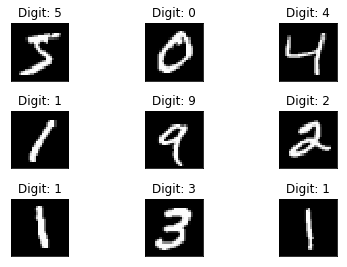

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig.show()

# Data preparation and reshaping


In [4]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# Build model


In [5]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

For given model we have Conv2D -> Conv2D -> MaxPool -> Dropout -> Flatten -> Dense -> Dropout -> Dense layers.

# Train model
On my laptop each epoch takes almost 1 minute to complete, so overall time is arouunf 10-11 minutes:



In [6]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 61s 1ms/step - loss: 0.2819 - acc: 0.9130 - val_loss: 0.0608 - val_acc: 0.9804
Epoch 2/12
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0913 - acc: 0.9728 - val_loss: 0.0403 - val_acc: 0.9871
Epoch 3/12
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0671 - acc: 0.9799 - val_loss: 0.0335 - val_acc: 0.9892
Epoch 4/12
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0543 - acc: 0.9839 - val_loss: 0.0294 - val_acc: 0.9904
Epoch 5/12
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0483 - acc: 0.9856 - val_loss: 0.0307 - val_acc: 0.9897
Epoch 6/12
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0413 - acc: 0.9876 - val_loss: 0.0271 - val_acc: 0.9904
Epoch 7/12
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0389 - acc: 0.9880 - val_loss: 0.0317 - val_acc

# Save model
Let’s save model and weights for further use:

In [7]:
model.save("./mnist_cnn_trained_model.h5")


# Load model and use it for prediction


In [8]:
from keras.models import load_model
model = load_model('./mnist_cnn_trained_model.h5')


In [9]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 3s 290us/step
Test loss: 0.026423870547835394
Test accuracy: 0.9909
